**Primer punto**

       Year  Month  Day   SSN      Fecha
0      1945      1    1  10.0 1945-01-01
1      1945      1    2   0.0 1945-01-02
2      1945      1    3   1.0 1945-01-03
3      1945      1    4   2.0 1945-01-04
4      1945      1    5  11.0 1945-01-05
...     ...    ...  ...   ...        ...
26658  2017     12   27   NaN 2017-12-27
26659  2017     12   28   NaN 2017-12-28
26660  2017     12   29   NaN 2017-12-29
26661  2017     12   30   NaN 2017-12-30
26662  2017     12   31   NaN 2017-12-31

[26663 rows x 5 columns]


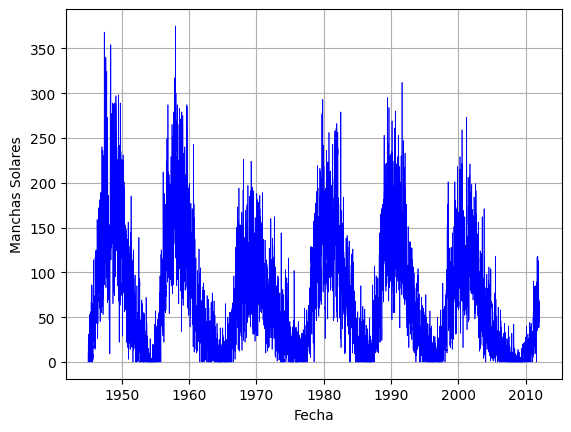

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

columnas = ["Year", "Month", "Day", "SSN"]

data = pd.read_csv("data.txt", delim_whitespace=True, skiprows=2, names = columnas)


data["Fecha"] = pd.to_datetime(data[['Year', 'Month', 'Day']])

print(data)

hasta = data[data["Fecha"] <= '2012-01-01']

plt.plot(hasta["Fecha"], hasta["SSN"], color='blue', linewidth=0.5)
plt.xlabel('Fecha')
plt.ylabel('Manchas Solares')
plt.grid(True)
plt.show()



1.1

5.759439721703873e-07


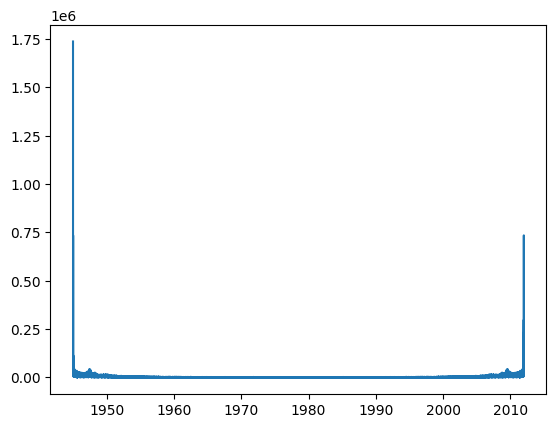

In [4]:
ssn_fft= abs(np.fft.fft(hasta['SSN']))
freq_prin=max(abs(ssn_fft))
print(1/freq_prin)

plt.plot(hasta["Fecha"], ssn_fft)



1.2

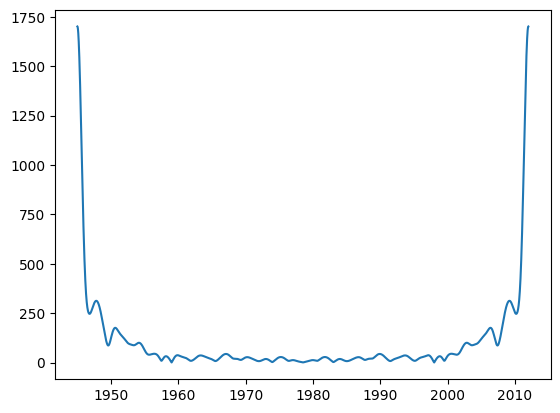

In [5]:
a=1000
hasta.shape
señal_filtrada=np.fft.fft( hasta['SSN']*np.exp(-(np.fft.fftfreq(24472)*a)**2) )
plt.plot(hasta["Fecha"],abs(señal_filtrada))
plt.show()

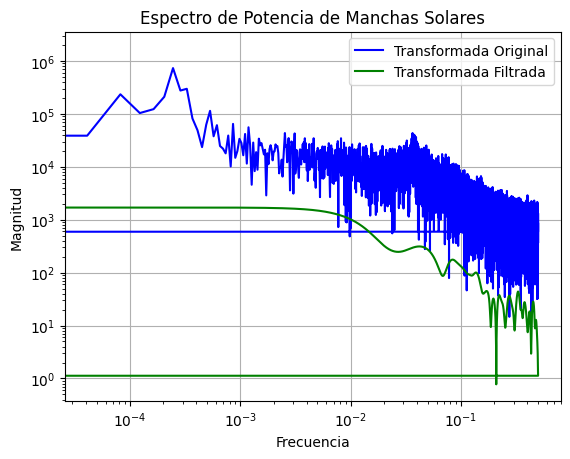

In [8]:
freqs = np.fft.fftfreq(len(hasta))
plt.loglog(freqs, np.abs(ssn_fft), label='Transformada Original', color='blue')

plt.loglog(freqs, np.abs(señal_filtrada), label='Transformada Filtrada', color='green')

plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')
plt.title('Espectro de Potencia de Manchas Solares')
plt.legend()
plt.grid(True)
plt.show()

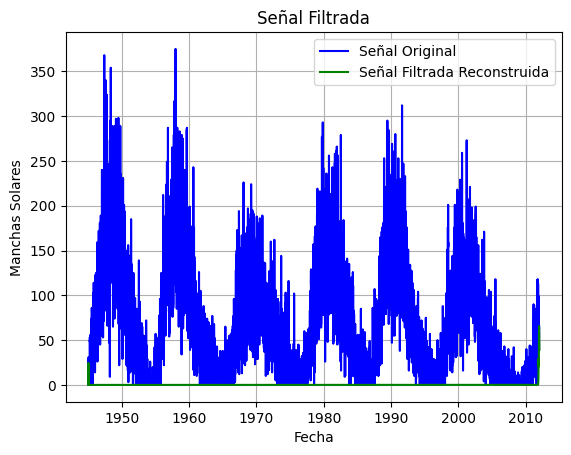

In [12]:
señal_original_inv = np.fft.ifft(ssn_fft).real
señal_filtrada_inv = np.fft.ifft(señal_filtrada).real

plt.plot(hasta["Fecha"], hasta["SSN"], label='Señal Original', color='blue')
plt.xlabel('Fecha')
plt.ylabel('Manchas Solares')
plt.title('Señal Original')
plt.legend()
plt.grid(True)



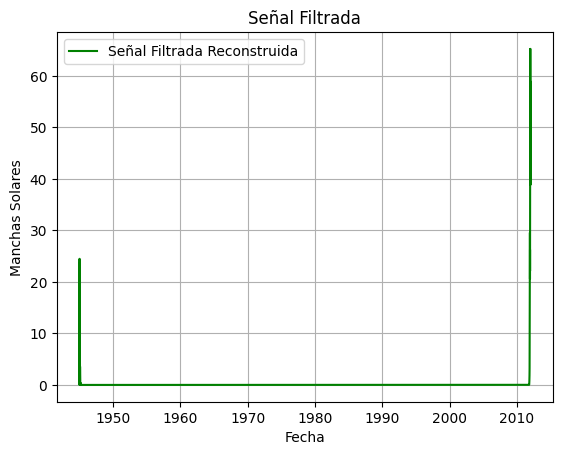

In [13]:
plt.plot(hasta["Fecha"], señal_filtrada_inv, label='Señal Filtrada Reconstruida', color='green')
plt.xlabel('Fecha')
plt.ylabel('Manchas Solares')
plt.title('Señal Filtrada')
plt.legend()
plt.grid(True)

1.3

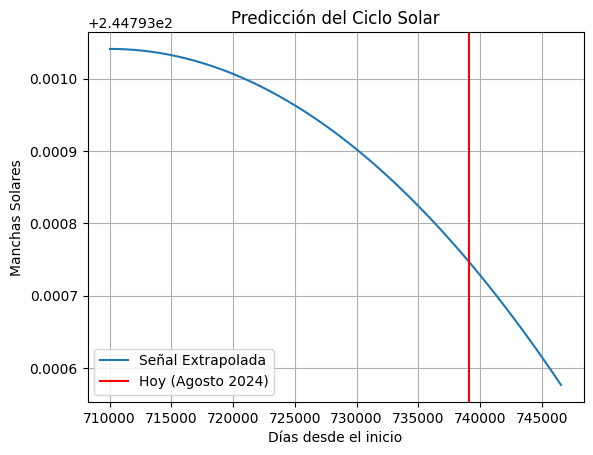

Se esperan aproximadamente 244.79374673919813 manchas solares a mitad de agosto de 2024.
244.79374673919813


In [31]:
import datetime

n = 10

frecuencias_bajas = np.concatenate([freqs[:n], freqs[-n:]])
transformada_baja = np.concatenate([ssn_fft[:n], ssn_fft[-n:]])

inicio = hasta['Fecha'].min()
fin = pd.to_datetime('2045-01-01')
dias = (fin - inicio).days
tiempo = np.arange(dias)

N = len(hasta)
tiempos_normalizados = tiempo / N

senal_extra = np.zeros_like(tiempo, dtype=np.complex128)

for k in range(2*n):
    senal_extra += transformada_baja[k] * np.exp(2j * np.pi * tiempos_normalizados * frecuencias_bajas[k])

senal_extra /= N

senal_extraR = np.real(senal_extra)


fecha_actual = datetime.date(2024, 8, 15)
dias_actual = (fecha_actual - inicio.date()).days


actual = np.where(tiempo == dias_actual)[0][0]
manchas_solares_actuales = senal_extraR[actual]


plt.plot(tiempo + inicio.toordinal(), senal_extraR, label='Señal Extrapolada')
plt.axvline(x=fecha_actual.toordinal(), color='red', label='Hoy (Agosto 2024)')
plt.xlabel('Días desde el inicio')
plt.ylabel('Manchas Solares')
plt.title('Predicción del Ciclo Solar')
plt.legend()
plt.grid(True)
plt.show()


print("Se esperan aproximadamente", manchas_solares_actuales, "manchas solares a mitad de agosto de 2024.")


*Segundo Punto*

In [ ]:
import numpy as np
from PIL import Image as Im
import matplotlib.pyplot as plt

img= np.array(Im.open("Noisy_Smithsonian_Castle.jpg")).astype(float)
img.shape

h=np.fft.fft2(img)
l=np.fft.fftshift(h)

l[0:445,595:605] = 1
l[452:900,595:605] = 1

l[445:455,495:505] = 1
l[445:455,695:705] = 1

l[465:475,495:505] = 1
l[465:475,695:705] = 1
#[y,x]
l[418:428,495:505] = 1
l[418:428,695:705] = 1

l[393:403,495:505] = 1
l[393:403,695:705] = 1

l[368:378,495:505] = 1
l[368:378,695:705] = 1

#-------------------------------

l[490:500,495:505] = 1
l[490:500,695:705] = 1
inv = np.fft.ifft2(np.fft.ifftshift(l))

plt.figure(figsize=(15,15))
plt.imshow(abs(l),norm="log",cmap="magma")


In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(np.angle(l),norm="log",cmap="magma")

In [ ]:
plt.figure(figsize=(15, 15))
plt.imshow(inv.real, cmap='gray')
plt.title("Imagen sin ruido periódico")
plt.show()